Signal x shape: (128,)


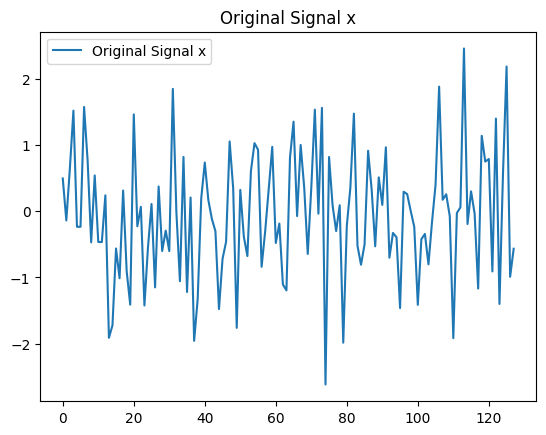

Wavelet coefficients s shape: (128,)
Matrix Psi shape: (128, 128)
Thresholded coefficients s_hat shape: (128,)
Reconstructed Signal x_hat shape: (128,)


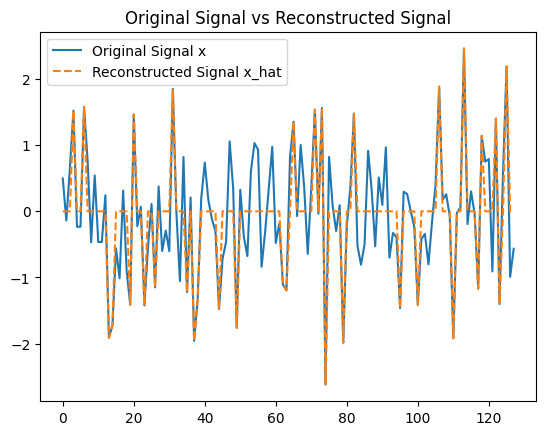

Mean Squared Error (MSE) between x and x_hat: 0.2230


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct
from pywt import wavedec, waverec

def create_signal(n, seed=None):
    """
    Creates a random signal of length n.
    
    Parameters:
    - n (int): Length of the signal.
    - seed (int): Seed for random number generator for reproducibility.
    
    Returns:
    - numpy.ndarray: Random signal of length n.
    """
    if seed is not None:
        np.random.seed(seed)
    return np.random.randn(n)

def create_psi_matrix(n, transform_type='wavelet', wavelet='db4', level=None):
    """
    Constructs the Psi matrix of size (n, n) based on the specified transform type.
    
    Parameters:
    - n (int): The dimension of the Psi matrix (n x n).
    - transform_type (str): The type of transform to use. Can be 'wavelet' (default) or 'dct'.
    - wavelet (str): The type of wavelet to use for DWT. Default is 'db4'.
    - level (int or None): The decomposition level (used only for wavelet).
    
    Returns:
    - numpy.ndarray: The Psi matrix of shape (n, n).
    """
    if transform_type == 'wavelet':
        psi = np.zeros((n, n))
        for ii in range(n):
            ek = np.zeros(n)
            ek[ii] = 1
            coeffs = wavedec(ek, wavelet, level=level)
            psi_row = waverec(coeffs, wavelet)[:n]
            psi[ii, :] = psi_row

    elif transform_type == 'dct':
        # Create the DCT matrix where each row is a DCT basis function
        psi = dct(np.eye(n), norm='ortho')

    else:
        raise ValueError("transform_type must be either 'wavelet' or 'dct'")
    
    return psi

def transform_signal(x, transform_type='wavelet', wavelet='db4', level=None):
    """
    Transforms the signal x into the sparse domain using the specified transform.
    
    Parameters:
    - x (numpy.ndarray): The original signal.
    - transform_type (str): The type of transform to use. Can be 'wavelet' or 'dct'.
    - wavelet (str): The type of wavelet to use for DWT. Default is 'db4'.
    - level (int or None): The decomposition level (used only for wavelet).
    
    Returns:
    - tuple: (s, Psi) where s is the sparse representation and Psi is the basis matrix.
    """
    n = len(x)
    Psi = create_psi_matrix(n, transform_type=transform_type, wavelet=wavelet, level=level)
    s = np.dot(Psi, x)
    return s, Psi

def threshold_signal(s, percentile=30):
    """
    Thresholds the signal s by magnitude to remove a given percentage of coefficients.
    
    Parameters:
    - s (numpy.ndarray): The sparse representation.
    - percentile (float): The percentile of coefficients to retain.
    
    Returns:
    - numpy.ndarray: The thresholded sparse representation.
    """
    threshold = np.percentile(np.abs(s), percentile)
    return np.where(np.abs(s) >= threshold, s, 0)

def reconstruct_signal(s_hat, Psi):
    """
    Reconstructs the signal from the thresholded sparse representation.
    
    Parameters:
    - s_hat (numpy.ndarray): The thresholded sparse representation.
    - Psi (numpy.ndarray): The basis matrix.
    
    Returns:
    - numpy.ndarray: The reconstructed signal.
    """
    return np.dot(Psi.T, s_hat)

def evaluate_reconstruction(x, x_hat):
    """
    Evaluates and plots the original and reconstructed signals, and computes the MSE.
    
    Parameters:
    - x (numpy.ndarray): The original signal.
    - x_hat (numpy.ndarray): The reconstructed signal.
    
    Returns:
    - float: Mean Squared Error (MSE) between the original and reconstructed signals.
    """
    plt.figure()
    plt.plot(x, label='Original Signal x')
    plt.plot(x_hat, label='Reconstructed Signal x_hat', linestyle='--')
    plt.title("Original Signal vs Reconstructed Signal")
    plt.legend()
    plt.show()
    
    mse = np.mean((x - x_hat)**2)
    print(f"Mean Squared Error (MSE) between x and x_hat: {mse:.4f}")
    return mse

# Main execution

# Step 1: Create a random signal x
n = 128
x = create_signal(n, seed=42)
print(f"Signal x shape: {x.shape}")

# Step 2: Plot random signal
plt.figure()
plt.plot(x, label='Original Signal x')
plt.title("Original Signal x")
plt.legend()
plt.show()

# Step 3: Transform the signal to sparse domain
# Choose between 'wavelet' or 'dct'
s, Psi = transform_signal(x, transform_type='wavelet', wavelet='db4', level=None)
#s, Psi = transform_signal(x, transform_type='dct')
print(f"Wavelet coefficients s shape: {s.shape}")
print(f"Matrix Psi shape: {Psi.shape}")

# Step 4: Threshold the sparse representation
s_hat = threshold_signal(s, percentile=75)
print(f"Thresholded coefficients s_hat shape: {s_hat.shape}")

# Step 5: Reconstruct the signal
x_hat = reconstruct_signal(s_hat, Psi)
print(f"Reconstructed Signal x_hat shape: {x_hat.shape}")

# Step 6: Evaluate the reconstruction
mse = evaluate_reconstruction(x, x_hat)
